In [1]:
# predicting my country's Gdp

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats


In [3]:
data=pd.read_csv("GDP.csv",skiprows=3)

In [4]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [5]:
data.drop(["Unnamed: 62"],axis=1,inplace=True)

In [6]:
print(data.shape)

(264, 62)


In [7]:
# cleaning the data ,we need two colums for year and GDP for easy analysis

In [8]:
clean_data=pd.melt(
    data,
    id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],
    var_name='year',
    value_name='GDP'
)
clean_data['year']=clean_data['year'].astype(int)

In [9]:
clean_data['year']

0        1960
1        1960
2        1960
3        1960
4        1960
5        1960
6        1960
7        1960
8        1960
9        1960
10       1960
11       1960
12       1960
13       1960
14       1960
15       1960
16       1960
17       1960
18       1960
19       1960
20       1960
21       1960
22       1960
23       1960
24       1960
25       1960
26       1960
27       1960
28       1960
29       1960
         ... 
15282    2017
15283    2017
15284    2017
15285    2017
15286    2017
15287    2017
15288    2017
15289    2017
15290    2017
15291    2017
15292    2017
15293    2017
15294    2017
15295    2017
15296    2017
15297    2017
15298    2017
15299    2017
15300    2017
15301    2017
15302    2017
15303    2017
15304    2017
15305    2017
15306    2017
15307    2017
15308    2017
15309    2017
15310    2017
15311    2017
Name: year, Length: 15312, dtype: int32

In [10]:
# drop rows with na values 

In [11]:
df=clean_data.dropna()
df.head(100)

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
11,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.857319e+10
12,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,1960,6.592694e+09
14,Burundi,BDI,GDP (current US$),NY.GDP.MKTP.CD,1960,1.960000e+08
15,Belgium,BEL,GDP (current US$),NY.GDP.MKTP.CD,1960,1.165872e+10
16,Benin,BEN,GDP (current US$),NY.GDP.MKTP.CD,1960,2.261956e+08
17,Burkina Faso,BFA,GDP (current US$),NY.GDP.MKTP.CD,1960,3.304428e+08
18,Bangladesh,BGD,GDP (current US$),NY.GDP.MKTP.CD,1960,4.274894e+09
21,"Bahamas, The",BHS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.698039e+08
24,Belize,BLZ,GDP (current US$),NY.GDP.MKTP.CD,1960,2.807189e+07


In [12]:
# remove rows which are not country names 

In [13]:
df.drop(['Country Name'],axis=1,inplace=True)

C:\Users\d1\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
df

,Country Code,Indicator Name,Indicator Code,year,GDP
1,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
11,AUS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.857319e+10
12,AUT,GDP (current US$),NY.GDP.MKTP.CD,1960,6.592694e+09
14,BDI,GDP (current US$),NY.GDP.MKTP.CD,1960,1.960000e+08
15,BEL,GDP (current US$),NY.GDP.MKTP.CD,1960,1.165872e+10
16,BEN,GDP (current US$),NY.GDP.MKTP.CD,1960,2.261956e+08
17,BFA,GDP (current US$),NY.GDP.MKTP.CD,1960,3.304428e+08
18,BGD,GDP (current US$),NY.GDP.MKTP.CD,1960,4.274894e+09
21,BHS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.698039e+08
24,BLZ,GDP (current US$),NY.GDP.MKTP.CD,1960,2.807189e+07


In [15]:
df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [16]:
df.head(100)

,Country Code,year,GDP
1,AFG,1960,5.377778e+08
11,AUS,1960,1.857319e+10
12,AUT,1960,6.592694e+09
14,BDI,1960,1.960000e+08
15,BEL,1960,1.165872e+10
16,BEN,1960,2.261956e+08
17,BFA,1960,3.304428e+08
18,BGD,1960,4.274894e+09
21,BHS,1960,1.698039e+08
24,BLZ,1960,2.807189e+07


In [17]:
# filtering out a country for instance japan
my_country='JPN'
filter=df['Country Code']!=my_country
jpn=df.drop(df[filter].index,inplace=False)
jpn


,Country Code,year,GDP
117,JPN,1960,4.430734e+10
381,JPN,1961,5.350862e+10
645,JPN,1962,6.072302e+10
909,JPN,1963,6.949813e+10
1173,JPN,1964,8.174901e+10
1437,JPN,1965,9.095028e+10
1701,JPN,1966,1.056281e+11
1965,JPN,1967,1.237819e+11
2229,JPN,1968,1.466011e+11
2493,JPN,1969,1.722042e+11


In [18]:
# perfrom a correlation analysis to see whether their is any relationship between the two variables to see whether their is any relationship

In [19]:
from scipy.stats import pearsonr
corr=pearsonr(jpn.year,jpn.GDP)
print(corr)

(0.9455425656939768, 5.650472808994271e-29)


In [20]:
# there is a strong relationship between the two variables

In [21]:
x=jpn[['year']].values
y=jpn['GDP'].values
regr=sklearn.linear_model.LinearRegression()
model=regr.fit(x,y)
score=regr.score(x,y)
score=round(score*100,2)
print('score={}'.format(score))
coef=regr.coef_
print('coef={}'.format(coef))
intercept=regr.intercept_
print('intercept={}'.format(intercept))




score=89.41
coef=[1.18421747e+11]
intercept=-232776694261052.8


In [22]:
# plotting a scatter plot with the fittted regression line

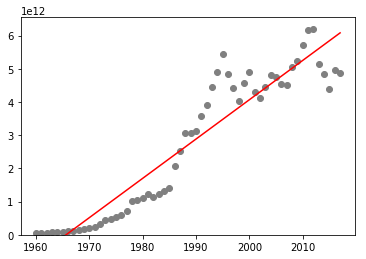

In [23]:
y_pred=model.predict(x)
plt.scatter(x,y,color='gray')
plt.plot(x,y_pred,color="red")
plt.ylim(0)
plt.show()


In [26]:
# predicting the countys GDP in the year 2021
model1 = sklearn.linear_model.LinearRegression()
model1.fit(x,y)
x_new=[[2021]]
print(model1.predict(x_new))

    


[6.55365579e+12]


In [30]:
# try a new method
from scipy import stats 
X=jpn.year
y=jpn.GDP
slope, intercept, r, p, std_err = stats.linregress(X, y)
def modelprediction(x):
    return slope * x + intercept
y_pred=modelprediction(2021)
print('Japans gdp in 2021 will be : ',y_pred)




Japans gdp in 2021 will be :  6553655788162.531
